This notebook explores graphs theory and networks using Python.

Date Created: 4 Oct 2018
<br>
Last Modified: 5 Oct 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image

# 0.0 A bit of history

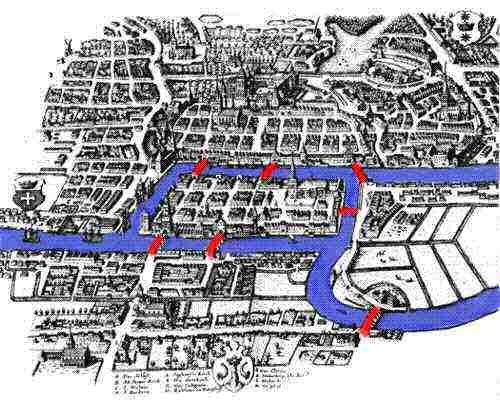

In [3]:
Image(filename='presentation_files/Konigsberg.jpg', width=600)
# Reference: https://www.maa.org/press/periodicals/convergence/leonard-eulers-solution-to-the-konigsberg-bridge-problem

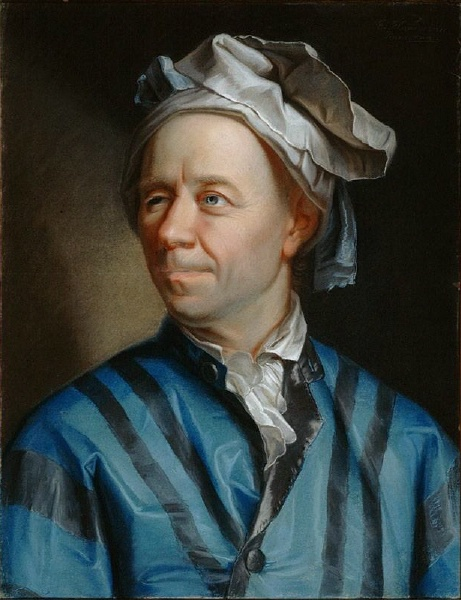

In [4]:
Image(filename='presentation_files/Leonhard_Euler.jpg', width=400)
# Reference: https://en.wikipedia.org/wiki/Leonhard_Euler

# 1.0 Networkx
https://networkx.github.io/documentation

In [5]:
import networkx as nx

In [6]:
import matplotlib.pyplot as plt

### Initialising a graph object 

In [7]:
G = nx.Graph() 

### Adding nodes

In [8]:
G.add_node(1) 

In [9]:
G.add_node("hello")

In [10]:
G.add_nodes_from([2, 3, 200, 201])

### Adding edges

In [11]:
G.add_edge(2, "hello")

In [12]:
G.add_edge(2, 201)

In [13]:
G.add_edge(1, 2)

In [14]:
G.add_edge(2, 201)

In [15]:
G.add_edge(200, 3)

### Additional attributes can be assigned

In [16]:
G[1][2]["weight"] = 64
G[1][2]["colour"] = "blue"
G["hello"][2]["some property"] = "value of that property"

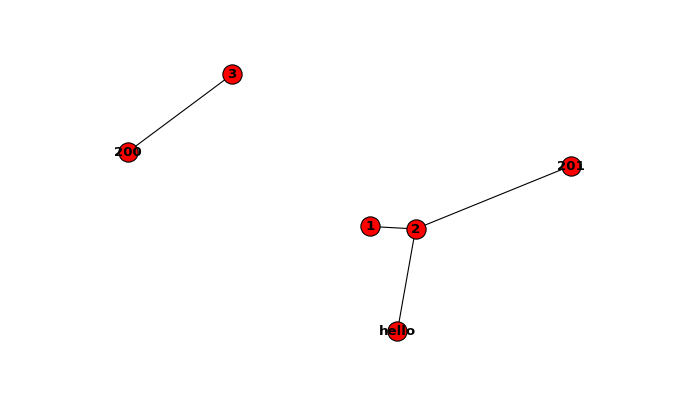

In [19]:
fig = plt.figure(figsize=(10,6))
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [18]:
G.number_of_nodes()

6

In [20]:
G.number_of_edges()

4

In [21]:
G.degree()

{1: 1, 2: 3, 3: 1, 200: 1, 201: 1, 'hello': 1}

In [22]:
G.adj

{1: {2: {'colour': 'blue', 'weight': 64}},
 2: {201: {},
  1: {'colour': 'blue', 'weight': 64},
  'hello': {'some property': 'value of that property'}},
 3: {200: {}},
 200: {3: {}},
 201: {2: {}},
 'hello': {2: {'some property': 'value of that property'}}}

In [23]:
list(G.adj)

[1, 2, 3, 200, 201, 'hello']

In [24]:
G.adjacency_list()

[[2], [201, 1, 'hello'], [200], [3], [2], [2]]

# 2.0 Directed graphs

In [25]:
DG = nx.DiGraph()

In [26]:
DG.add_weighted_edges_from([("J", "S", 1), 
                            ("S", "J", 1), ("S", "W", 1),
                            ("W", "J", 1), ("W", "S", 1)],)

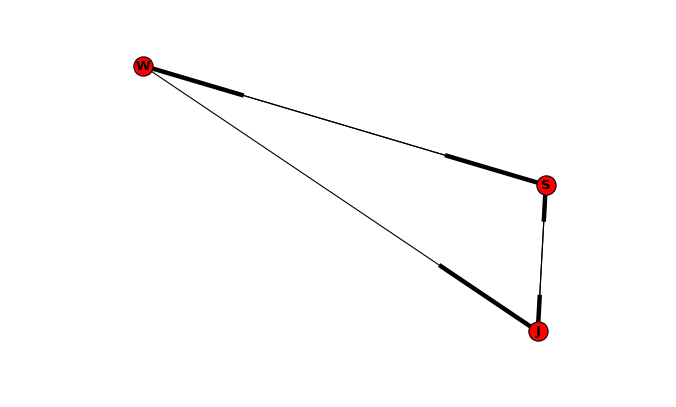

In [28]:
fig = plt.figure(figsize=(10,6))
plt.subplot(111)
nx.draw(DG, with_labels=True, font_weight='bold')
plt.show()

In [29]:
DG.out_degree("J", weight='weight')

1

In [30]:
list(DG.successors("W"))

['S', 'J']

In [31]:
DG.order()

3

In [32]:
DG.size()

5

# 3.0 A bigger example

In [33]:
G = nx.karate_club_graph()

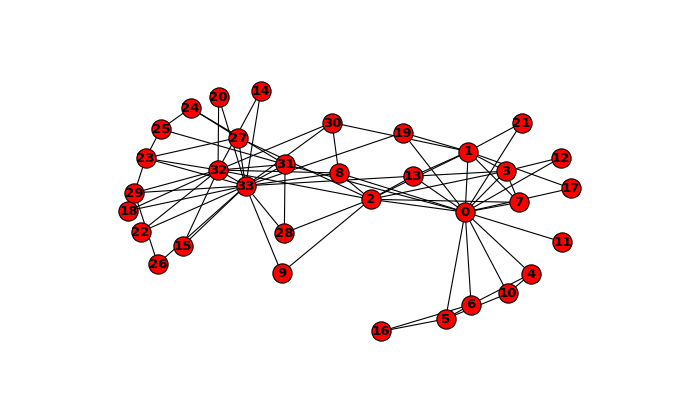

In [34]:
fig = plt.figure(figsize=(10,6))
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [35]:
G.order()

34

In [36]:
G.degree()

{0: 16,
 1: 9,
 2: 10,
 3: 6,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 8: 5,
 9: 2,
 10: 3,
 11: 1,
 12: 2,
 13: 5,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 3,
 20: 2,
 21: 2,
 22: 2,
 23: 5,
 24: 3,
 25: 3,
 26: 2,
 27: 4,
 28: 3,
 29: 4,
 30: 4,
 31: 6,
 32: 12,
 33: 17}

In [42]:
import numpy as np

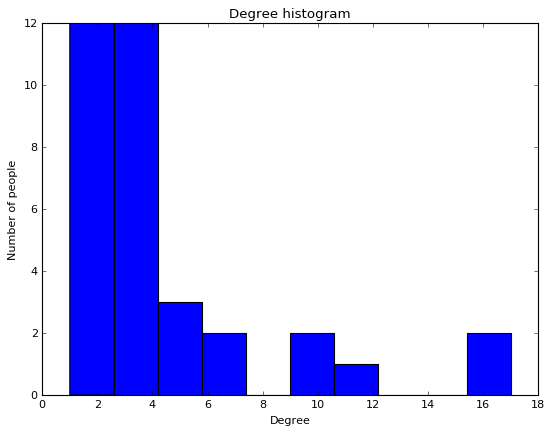

In [45]:
degree_list = [d for n, d in G.degree().items()]  # This peculiar operation is the so-called "list comprehension" in Python.
degree_sequence = sorted(degree_list, reverse=True) # Sort the values of the list
dmax = max(degree_sequence) # Get the maximum value

# Plot the histogram
plt.figure(figsize=(8,6))
plt.hist(np.array(degree_sequence))
plt.title("Degree histogram")
plt.ylabel("Number of people")
plt.xlabel("Degree")

plt.show()

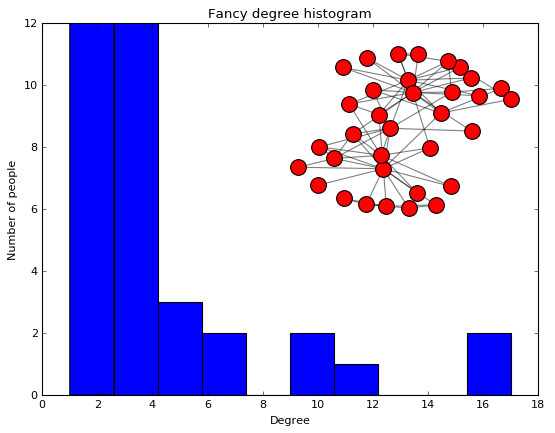

In [46]:
degree_list = [d for n, d in G.degree().items()]  # This peculiar operation is the so-called "list comprehension" in Python.
degree_sequence = sorted(degree_list, reverse=True) # Sort the values of the list
dmax = max(degree_sequence) # Get the maximum value

# Plot the histogram
plt.figure(figsize=(8,6))
plt.hist(np.array(degree_sequence))
plt.title("Fancy degree histogram")
plt.ylabel("Number of people")
plt.xlabel("Degree")

# Draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()